### Importación de librerías

Se importan las principales librerías utilizadas en el análisis y preprocesamiento:

- `pandas`: para la manipulación de datos tabulares.
- `numpy`: para operaciones numéricas.
- `matplotlib.pyplot`: para visualización básica.
- `seaborn`: para visualizaciones estadísticas más estilizadas.
- `re`: para trabajar con expresiones regulares.
- `scipy.stats.ttest_ind`: para realizar pruebas t de comparación de medias.
- `scipy.stats.chi2_contingency`: para pruebas de independencia entre variables categóricas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


## Carga de datos

Cargamos el dataset en excel utilizando `pandas` para hacer el EDA y hacemos una vista general.

In [3]:
df = pd.read_excel('data.xlsx')

In [4]:
df.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         3500 non-null   int64 
 1   Patient Age                3500 non-null   int64 
 2   Patient Sex                3500 non-null   object
 3   Left-Fundus                3500 non-null   object
 4   Right-Fundus               3500 non-null   object
 5   Left-Diagnostic Keywords   3500 non-null   object
 6   Right-Diagnostic Keywords  3500 non-null   object
 7   N                          3500 non-null   int64 
 8   D                          3500 non-null   int64 
 9   G                          3500 non-null   int64 
 10  C                          3500 non-null   int64 
 11  A                          3500 non-null   int64 
 12  H                          3500 non-null   int64 
 13  M                          3500 non-null   int64 
 14  O       

### Descripción del conjunto de datos  
- **Filas (pacientes):** 3 500  
- **Columnas:** 15  
  - Información demográfica: `ID`, `Patient Age`, `Patient Sex`  
  - Rutas de imagen: `Left-Fundus`, `Right-Fundus`  
  - Observaciones clínicas: `Left-Diagnostic Keywords`, `Right-Diagnostic Keywords`  
  - Etiquetas binarias: `N`, `D`, `G`, `C`, `A`, `H`, `M`, `O` 
    

In [6]:
print(type(df["Patient Sex"][0]))
print(type(df["Left-Fundus"][0]))
print(type(df["Right-Fundus"][0]))
print(type(df["Left-Diagnostic Keywords"][0]))
print(type(df["Right-Diagnostic Keywords"][0]))


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


Revisamos duplicados en ID

In [7]:
df.duplicated().sum()  # Verificar si hay filas duplicadas 

0

In [8]:
df.ID.duplicated().sum()  # Verificar si hay IDs duplicados

0

Min: 1
Max: 91
Media: 57.854
Mediana: 59.0
Moda: 56


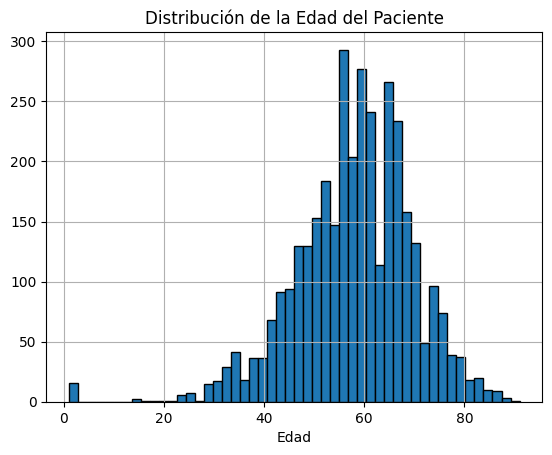

In [49]:
df["Patient Age"].hist(bins=50, edgecolor='black')
plt.title('Distribución de la Edad del Paciente')
plt.xlabel('Edad')
print(f"Min: {np.min(df['Patient Age'])}")
print(f"Max: {np.max(df['Patient Age'])}")
print(f"Media: {np.mean(df['Patient Age'])}")
print(f"Mediana: {np.median(df['Patient Age'])}")
print(f"Moda: {df['Patient Age'].value_counts().index.astype(int)[0]}")

### Distribución de la edad de los pacientes

El histograma anterior representa la frecuencia de edades 

| Métrica | Valor |
|---------|-------|
| Min  | 1 año |
| Max | 91 años |
| Media | 59 años |
| Mediana |  57.8 años |
| Moda visual | 56 años |
| Curtosis / Forma | Distribución unimodal ligeramente sesgada a la izquierda?? |
| Curtosis / Forma | Distribución aproximadamente unimodal, ligera cola derecha (mayores de 75 años) |

In [10]:
df[df["Patient Age"] > 1].sort_values(by="Patient Age", ascending=True).head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
2265,2888,14,Female,2888_left.jpg,2888_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2410,3033,15,Male,3033_left.jpg,3033_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
3242,4392,17,Male,4392_left.jpg,4392_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
2924,4047,18,Female,4047_left.jpg,4047_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
2280,2903,19,Male,2903_left.jpg,2903_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0


In [11]:
df[df["Patient Age"] < 10]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
1169,1242,1,Female,1242_left.jpg,1242_right.jpg,chorioretinal atrophy,normal fundus,0,0,0,0,0,0,0,1
1383,1563,1,Female,1563_left.jpg,1563_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1384,1564,1,Female,1564_left.jpg,1564_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1385,1565,1,Female,1565_left.jpg,1565_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1388,1568,1,Female,1568_left.jpg,1568_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1400,1583,1,Female,1583_left.jpg,1583_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1404,1588,1,Female,1588_left.jpg,1588_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1405,1589,1,Female,1589_left.jpg,1589_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1406,1590,1,Female,1590_left.jpg,1590_right.jpg,normal fundus,pathological myopia,0,0,0,0,0,0,1,0
1410,1595,1,Female,1595_left.jpg,1595_right.jpg,tessellated fundus，peripapillary atrophy,pathological myopia,0,0,0,0,0,0,1,1


comentar con el equipo

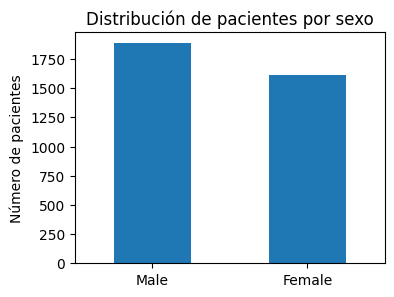

In [26]:
count = df['Patient Sex'].value_counts()
plt.figure(figsize=(4,3))
count.plot.bar()
plt.title('Distribución de pacientes por sexo')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Número de pacientes')
plt.show()

### Distribución por sexo de los pacientes

El gráfico de barras muestra el número total de pacientes según el sexo registrado.

| Sexo | Recuento | Porcentaje |
|------|----------|------------|
| Femenino | 1 620 | 46 % |
| Masculino | 1 880 | 54 % |
| **Total** | **3 500** | 100 % |

**Lo que observamos**  
  **Ligeramente más hombres (54 %)** que mujeres (46 %). 

/tmp/ipykernel_99300/3357102163.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette="Set2")


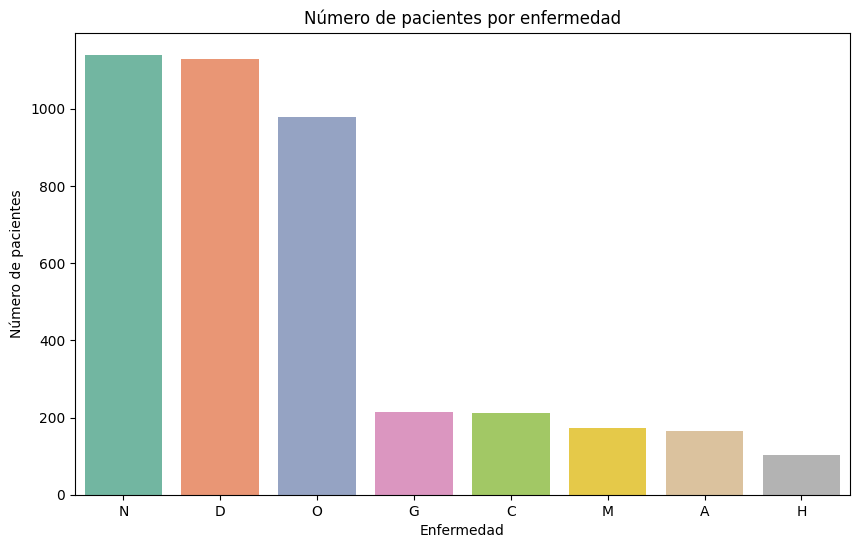

In [52]:
disease_cols = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

disease_counts = df[disease_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette="Set2")
plt.title('Número de pacientes por enfermedad')
plt.xlabel('Enfermedad')
plt.ylabel('Número de pacientes')
plt.show()

| Etiqueta | Enfermedad (ES / EN)                                                              | Descripción corta                                                                                                                             |
| -------- | --------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **N**    | Normal                                                                            | Fondo de ojo sin hallazgos patológicos: vasos, mácula y nervio óptico se ven “de libro”.                                                      |
| **D**    | Retinopatía diabética / Diabetic Retinopathy                                      | Daño progresivo en los vasos de la retina por la diabetes; puede causar hemorragias, edema macular y pérdida de visión.                       |
| **G**    | Glaucoma                                                                          | Lesión del nervio óptico (normalmente por presión intraocular alta); afecta primero la visión periférica y, sin tratamiento, lleva a ceguera. |
| **C**    | Catarata / Cataract                                                               | Opacidad del cristalino que nubla la visión; causa prevenible de ceguera, se soluciona con cirugía de reemplazo de lente.                     |
| **A**    | Degeneración macular asociada a la edad (DMAE) / Age-related Macular Degeneration | Deterioro de la mácula que borra la visión central (leer, reconocer caras).                                                                   |
| **H**    | Retinopatía hipertensiva / Hypertensive Retinopathy                               | Lesiones en los vasos retinianos por hipertensión crónica; provoca hemorragias, exudados y visión borrosa.                                    |
| **M**    | Miopía patológica / Pathologic Myopia                                             | Miopía muy alta que adelgaza y estira la retina, aumentando riesgo de desprendimiento y otras complicaciones.                                 |
| **O**    | Otras anomalías / Other Abnormalities                                             | Cajón de sastre: cualquier hallazgo que no encaje en las categorías anteriores (p. ej. oclusión arterial, membrana epirretiniana).            |


###  Diagnósticos únicos en el dataset

Esta función cuenta cuántos diagnósticos distintos aparecen en las columnas `Left-Diagnostic Keywords` y `Right-Diagnostic Keywords`, unificando sus contenidos, limpiando los datos y separando los distintos diagnósticos.

- Convierte ambas columnas en una sola lista de valores.
- Separa los diagnósticos usando un patrón de separadores:
  - Coma ASCII `,`
  - Coma china `，`
  - Punto y coma `;`
- Elimina espacios y homogeniza a minúsculas.
- Excluye entradas vacías.
- Calcula:
  - El conteo de cada diagnóstico.
  - El número total de diagnósticos únicos.

In [64]:

def contar_diagnosticos(df, columnas):
    """
    Devuelve (recuento_por_enfermedad, nº_total_distintas)
    """
    # Patrón que contempla:
    #   ,  -> coma ASCII
    #   ， -> coma china U+FF0C
    #   ;  -> punto y coma (opcional, por si acaso)
    separadores = r'[,\uFF0C;]\s*'
    s = (
        df[columnas]
          .stack()            # junta las columnas en un único Series
          .astype(str)        # asegura que todo es string
          .str.split(separadores, regex=True, expand=False)  # <-- AQUÍ EL CAMBIO
          .explode()          # cada elemento en su propia fila
          .str.strip()        # quita espacios al inicio/fin
          .str.lower()        # homogeneiza mayúsculas/minúsculas
    )

    s = s[s != '']            # elimina cadenas vacías
    recuento = s.value_counts()
    return recuento, recuento.size
    
cols = ["Left-Diagnostic Keywords", "Right-Diagnostic Keywords"]
conteo, total_distintas = contar_diagnosticos(df, cols)
print('Top 10 diagnósticos más frequentes:')
print(conteo.head(10))               # las 10 más frecuentes
print(f"\nTotal de diagnósticos distintos: {total_distintas}")


Top 10 diagnósticos más frequentes:
normal fundus                             3100
moderate non proliferative retinopathy     997
mild nonproliferative retinopathy          552
lens dust                                  408
cataract                                   313
glaucoma                                   282
pathological myopia                        246
dry age-related macular degeneration       228
macular epiretinal membrane                201
hypertensive retinopathy                   193
Name: count, dtype: int64

Total de diagnósticos distintos: 102


In [13]:
df[df['Left-Diagnostic Keywords'].str.contains('no fundus image')]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
3408,4580,68,Male,4580_left.jpg,4580_right.jpg,no fundus image,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


COMENTAMOS EQUIPO

###  Proporción de sexo por enfermedad

Procedemos a generar unos gráficos de barras para visualizar la proporción de pacientes masculinos y femeninos que presentan cada una de las enfermedades.

Esto permite observar si hay **sobrerrepresentación de algún sexo** en ciertas enfermedades.

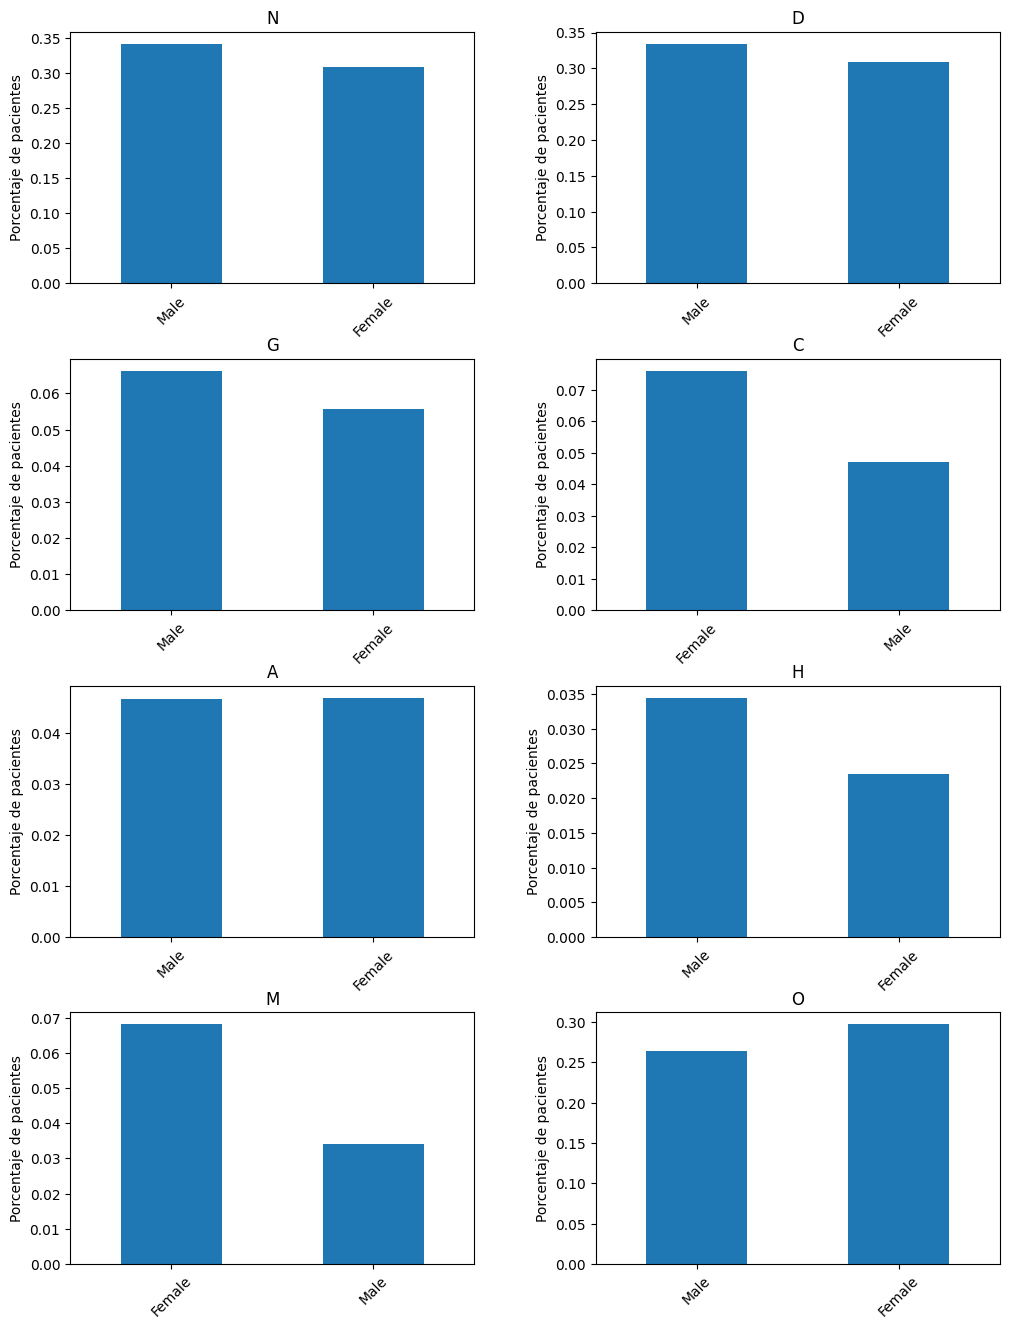

In [66]:
disease_cols = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
#print(type(df['Patient Sex'].value_counts()))
n_cols = 2
n_rows = 4
plt.figure(figsize=(6 * n_cols, 4 * n_rows))  # Dynamic figure size
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i, d in enumerate(disease_cols,start=1):
    df_sel = df[df[d] == 1]
    plt.subplot(n_rows, n_cols, i)
    counts = df_sel['Patient Sex'].value_counts()/df['Patient Sex'].value_counts()
    counts.plot.bar()
    plt.title(d)
    plt.xticks(rotation=45)
    plt.ylabel('Porcentaje de pacientes')
    plt.xlabel('')
    
plt.show()

### Distribución de edades por enfermedad

Generamos un conjunto de histogramas que muestran la distribución de edades para los pacientes que presentan cada una de las enfermedades listadas en `disease_cols`.

> Este análisis visual permite detectar diferencias en las distribuciones de edad entre distintas enfermedades.

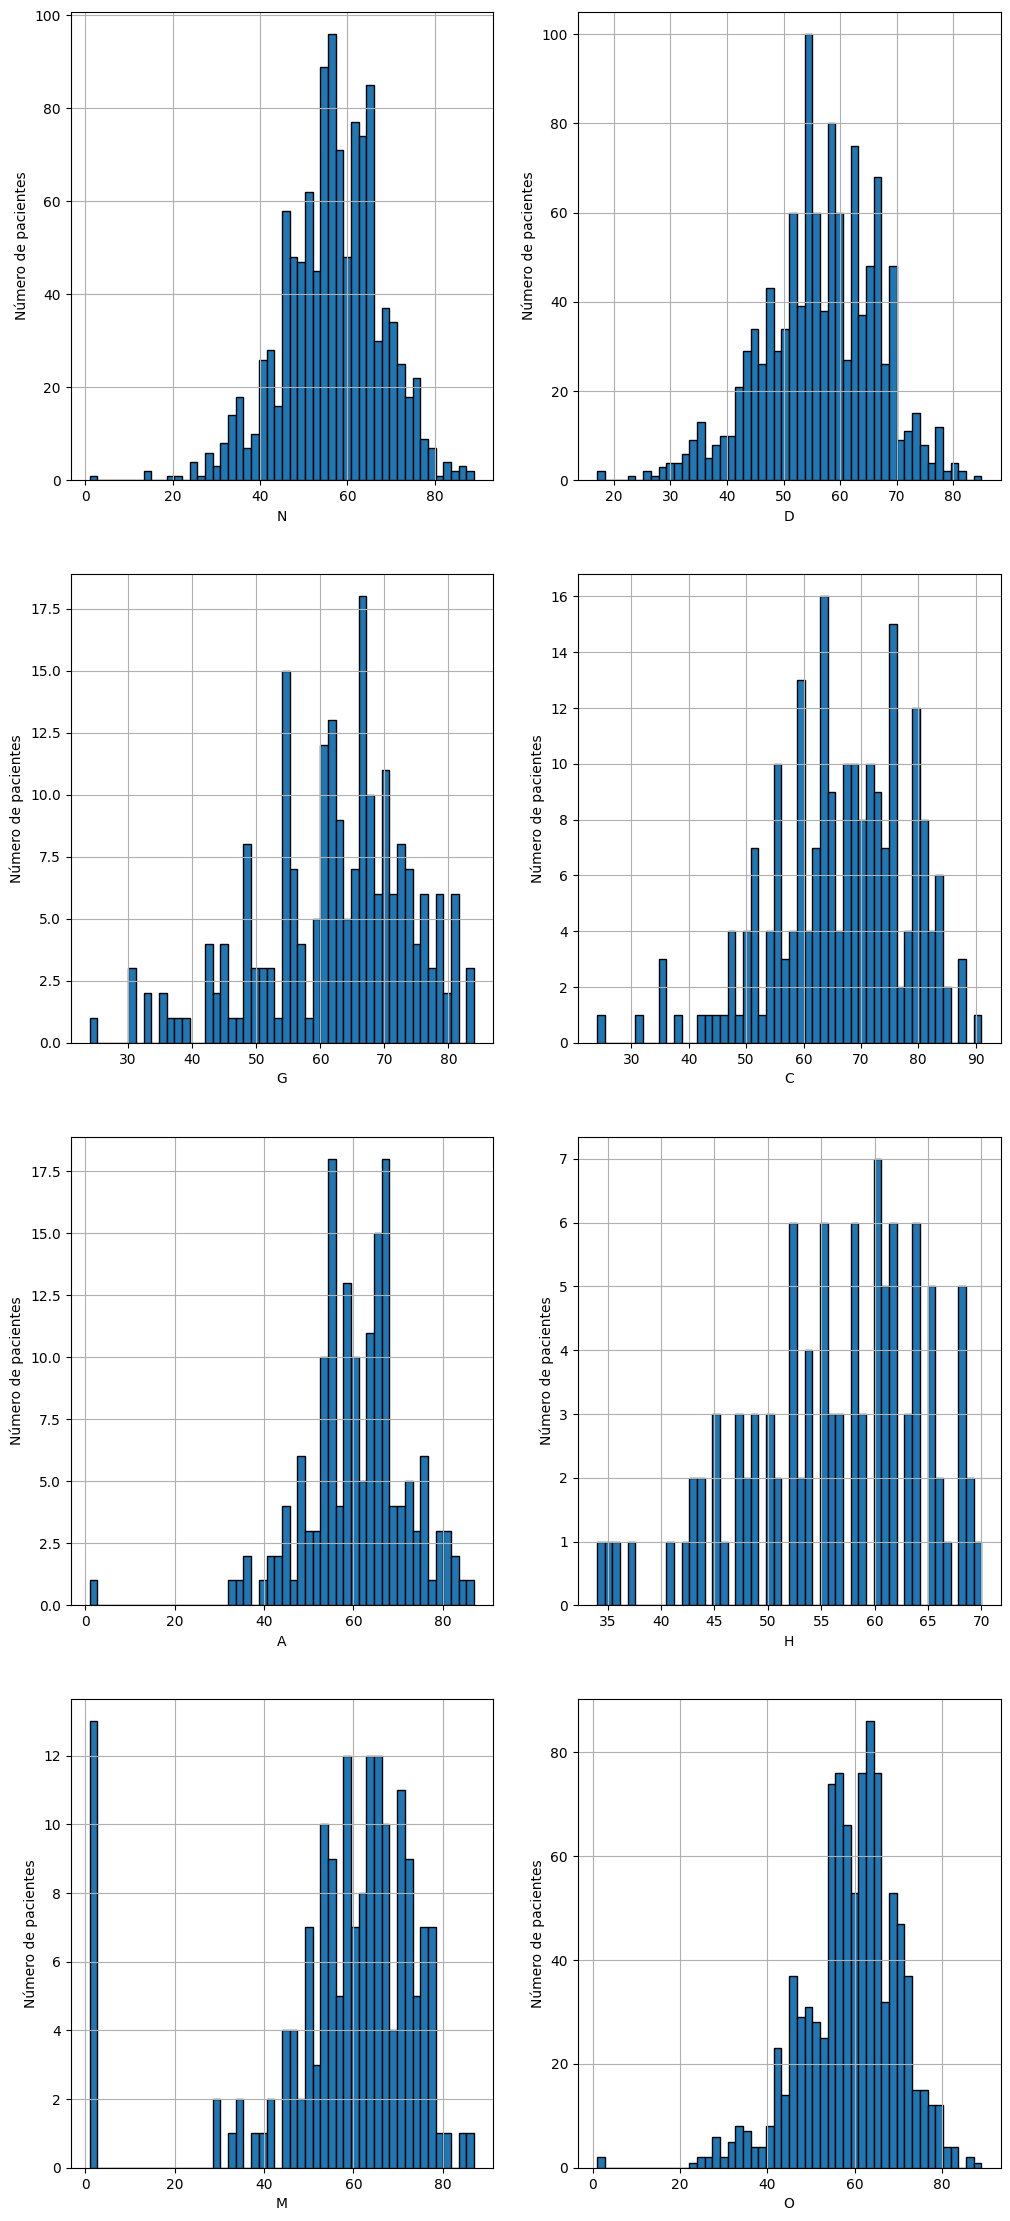

In [15]:
disease_cols = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
#print(type(df['Patient Sex'].value_counts()))
n_cols = 2
n_rows = 4
plt.figure(figsize=(6 * n_cols, 7 * n_rows))  # Dynamic figure size
for i, d in enumerate(disease_cols,start=1):
    df_sel = df[df[d] == 1]
    plt.subplot(n_rows, n_cols, i)
    #sns.kdeplot(df_sel['Patient Age'], fill=True, color='skyblue', alpha=0.5)
    df_sel["Patient Age"].hist(bins=50, edgecolor='black')
#    counts = df_sel['Patient Sex'].value_counts()/df['Patient Sex'].value_counts()
    plt.xlabel(d)
    plt.ylabel('Número de pacientes')
    
plt.show()


### Casos con enfermedad 'N' excluyendo "normal fundus"

Se aplica un filtro al DataFrame para seleccionar únicamente los registros que cumplen **ambas condiciones**:

1. La enfermedad `'N'` está presente (`N == 1`).
2. La columna `'Left-Diagnostic Keywords'` **no contiene** la expresión `"normal fundus"`.

Este filtrado permite identificar casos donde la enfermedad `'N'` está marcada, pero no se menciona que el fondo de ojo izquierdo es normal, lo cual podría indicar una inconsistencia o un caso clínicamente relevante.


In [16]:
# Filtro con ambas condiciones:
# 1) N == 1
# 2) La columna NO contiene "normal fundus"
mask = (df["N"] == 1) & (~df["Left-Diagnostic Keywords"].str.contains("normal fundus", na=False))

casos_n = df[mask]

# Si solo quieres ver los primeros 5 registros:
casos_n.shape
print(casos_n)

        ID  Patient Age Patient Sex    Left-Fundus    Right-Fundus  \
2642  3265           45        Male  3265_left.jpg  3265_right.jpg   
2779  3402           55      Female  3402_left.jpg  3402_right.jpg   
3015  4149           55        Male  4149_left.jpg  4149_right.jpg   
3147  4290           51        Male  4290_left.jpg  4290_right.jpg   

           Left-Diagnostic Keywords Right-Diagnostic Keywords  N  D  G  C  A  \
2642  lens dust，lens dust，lens dust   lens dust，normal fundus  1  0  0  0  0   
2779            lens dust，lens dust   lens dust，normal fundus  1  0  0  0  0   
3015              low image quality         low image quality  1  0  0  0  0   
3147              low image quality             normal fundus  1  0  0  0  0   

      H  M  O  
2642  0  0  0  
2779  0  0  0  
3015  0  0  0  
3147  0  0  0  


Debatir esta parte de los lens dust

In [17]:
x =  df[['D','G','C','A','H','M','O']].sum(axis=1)
x.value_counts().sort_index()

0    1140
1    1774
2     557
3      29
Name: count, dtype: int64

In [18]:
df["Patient Age"].describe()

count    3500.000000
mean       57.854000
std        11.724064
min         1.000000
25%        51.000000
50%        59.000000
75%        66.000000
max        91.000000
Name: Patient Age, dtype: float64

#### Test de independencia entre sexo del paciente y presencia de enfermedad

- Definimos una lista de enfermedades (sin incluir `'N'` ya que nos indica que es normal).
- Para cada enfermedad:
  - Construimos una tabla de contingencia cruzando `Patient Sex` con la presencia (1) o ausencia (0) de la enfermedad.
  - Calculamos la tabla de proporciones dividiendo por el total de pacientes por sexo (variable `patient_sex`).
  - Ejecutamos la prueba chi-cuadrado de independencia (`chi2_contingency`) para evaluar si la distribución del sexo es independiente de la presencia de la enfermedad.

In [ ]:
# Enfermedades sin 'N'
diseases = ['D', 'G', 'C', 'A', 'H', 'M', 'O']

sex_results = []

for disease in diseases:
    contingency_table = pd.crosstab(df['Patient Sex'], df[disease])
    df_porc = contingency_table.div(patient_sex, axis = 0)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    sex_results.append({'Enfermedad': disease, 'p-valor': p})
    #print(contingency_table)


pd.DataFrame(sex_results)

,Enfermedad,p-valor
0,D,0.110596
1,G,0.218863
2,C,0.000452
3,A,1.000000
4,H,0.070124
5,M,0.000005
6,O,0.035983


**Interpretación:**

- Un p-valor menor a 0.05 indica que la distribución del sexo está significativamente asociada con la presencia de la enfermedad.
- En este caso, las enfermedades **C**, **M** y **O** muestran asociación significativa con el sexo del paciente.
- Para las demás enfermedades, no se detecta asociación significativa.

In [49]:
print(df['Patient Sex'].value_counts())

Patient Sex
Male      1885
Female    1615
Name: count, dtype: int64


#### Test estadístico de diferencia de edad según enfermedad

Para cada enfermedad en la lista `diseases`:

- Se separan las edades de los pacientes que **tienen** la enfermedad (`age_with`) y los que **no la tienen** (`age_without`).
- Se realiza un test t de Student para muestras independientes y evaluar si las medias de edad difieren significativamente entre ambos grupos.

In [ ]:
age_results = []

for disease in diseases:
    age_with = df[df[disease] == 1]['Patient Age']
    age_without = df[df[disease] == 0]['Patient Age']
    t_stat, p = ttest_ind(age_with, age_without, equal_var=False)
    age_results.append({'Enfermedad': disease, 'p-valor': p})

pd.DataFrame(age_results)

,Enfermedad,p-valor
0,D,3.202204e-07
1,G,2.394235e-08
2,C,3.318899e-23
3,A,5.023733e-04
4,H,4.224286e-02
5,M,6.172347e-01
6,O,2.755665e-05


**Interpretación:**

- Los p-valor muy bajos indican que hay diferencias estadísticamente significativas en la edad de pacientes entre los grupos con y sin la enfermedad.
- En particular, las enfermedades **D, G, C, A, H y O** muestran diferencias significativas en edad.
- La enfermedad **M** no muestra diferencia significativa (p > 0.05).